# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I - Dados Estruturados, Não Estruturados e problemas típicos em bases de dados</span>


## <span style="color:darkred">Avaliação com soluções</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos


---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`. Essa base contém dados de profissionais da área da saúde incluindo: nome, sexo, ano de nascimento, religião, país e cidade de residência, país de origem, idade ao final de 2022, salário e ano do primeiro emprego.

### Questão 1)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`. 

Analise o atributo 'Sex' buscando por dados incorretos, considerando que são corretos apenas 'F' e 'M' (em letras maiúsculas). Corrija os que forem possível corrigir. 

Após o tratamento, analise as linhas com dados faltantes no atributo 'Sex', i.e. linhas que não sejam 'F' nem 'M', inspecionando em conjunto com as colunas: Year of Birth, Country of Residency e City (analisar apenas essas colunas). 

Com essa análise podemos dizer que os dados faltantes:
 
 (a) São do tipo completamente aleatório (MCAR)<br>
 **(b) São do tipo (condicionalmente) aleatório (MAR)**<br>
 (c) São do tipo não aleatório<br>
 (d) Não há dados faltantes<br>
 (e) Metade são do tipo (condicionalmente) aleatório (MAR) e a outra metade completamente aleatório (MCAR)<br>

In [1]:
import pandas as pd
df = pd.read_csv(r'./dados/TACTD-01-Base-Avaliacao2024.csv')
df.head()

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Country of Origin,Continent of Origin,Profession,Current Age 2022,Salary,Year first employment
0,Vinicius Vitorio,M,1940,Brazil,Christian,São Paulo,Australia,Oceania,Physical therapist,82,53626.3,1986.0
1,Ariel Almada,F,1950,Portugal,Christian,Lisbon,Australia,Oceania,Carpenter,72,47150.7,1976.0
2,Maia Banks,masc,1957,USA,Christian,New York,Australia,Oceania,Dental hygienist,65,50703.7,1990.0
3,Diego Colque,M,1958,Peru,Christian,Arequipa,Australia,Oceania,Event planner,64,56111.3,1987.0
4,Vivian Arnold,F,1960,Brazil,Christian,São Paulo,Australia,Oceania,Musician,62,48790.6,1995.0


In [2]:
df['Sex'].unique()

array(['M', 'F', 'masc', 'f', 'm', nan], dtype=object)

In [3]:
sexo = {'F': 'F', 'f': 'F', 'm': 'M', 'M': 'M', 'masc': 'M'}

# Aplicando a função lambda para mapear os valores
df['Sex'] = df['Sex'].apply(lambda x: sexo.get(x, x))


In [4]:
df['Sex'].unique()

array(['M', 'F', nan], dtype=object)

In [6]:
df[df['Sex'].isna()]

,Name,Sex,Year of Birth,Country of Residency,Religion,City,Country of Origin,Continent of Origin,Profession,Current Age 2022,Salary,Year first employment
90,Rupert Rollison,NaN,1986,England,Christian,Birmingham,New Zealand,Oceania,Nurse,36,49492.3,2016.0
91,Jameson Mendoza,NaN,1987,Mexico,Christian,Acapulco,Australia,Oceania,Construction worker,35,46206.1,NaN
92,Mayra Mcnish,NaN,1987,England,Christian,Birmingham,Australia,Oceania,Server,35,46957.2,2018.0
93,Willene Wolfgram,NaN,1987,USA,Christian,New Orleans,Australia,Oceania,Police Officer,35,49000.0,2017.0
94,Izaiah Duarte,NaN,1987,Brazil,Christian,São Paulo,Australia,Oceania,Nurse,35,49562.1,2016.0
95,Susie Hodges,NaN,1987,Brazil,Christian,São Paulo,Australia,Oceania,Chef,35,50418.9,NaN
96,David Pittman,NaN,1987,Australia,Christian,Brisbane,Australia,Oceania,Actor,35,52518.4,2020.0
97,Jim Foster,NaN,1988,USA,Christian,New Orleans,Australia,Oceania,Dentist,34,50469.8,NaN
98,Herta Hatley,NaN,1988,USA,Christian,New Orleans,Australia,Oceania,Human resources manager,34,54388.5,2011.0
99,Bernard Summers,NaN,1989,USA,Christian,New Orleans,Australia,Oceania,Sales representative,33,53984.6,2019.0


In [10]:
df['Year of Birth'].value_counts()

Year of Birth
1984    10
1981     7
1982     6
1987     6
1985     5
1962     5
1976     5
1980     4
1967     4
1973     4
1979     3
1978     3
1977     3
1974     3
1970     3
1983     3
1966     3
1965     3
1969     3
1972     2
1968     2
1986     2
1988     2
1989     2
1990     2
1940     1
1950     1
1971     1
1963     1
1961     1
1960     1
1958     1
1957     1
2010     1
Name: count, dtype: int64

In [17]:
# Função para separar anos em décadas
def decade(year):
    return str(year // 10 * 10) + "s"

# Aplicando a função para criar uma nova coluna com décadas
df['Decade of Birth'] = df['Year of Birth'].apply(decade)

In [20]:
df['Decade of Birth'].value_counts(normalize=True)*100

Decade of Birth
1980s    45.192308
1970s    25.961538
1960s    22.115385
1950s     2.884615
1990s     1.923077
1940s     0.961538
2010s     0.961538
Name: proportion, dtype: float64

In [21]:
df['Country of Residency'].value_counts(normalize=True)*100

Country of Residency
USA                     23.076923
Brazil                  13.461538
Spain                   10.576923
Scotland                 7.692308
Canada                   7.692308
Mexico                   6.730769
Australia                6.730769
England                  6.730769
Portugal                 5.769231
Peru                     5.769231
United Arab Emirates     4.807692
Wales                    0.961538
Name: proportion, dtype: float64

In [22]:
df['City'].value_counts(normalize=True)*100

City
New Orleans    18.269231
São Paulo      12.500000
Valencia       10.576923
Edinburgh       8.653846
Acapulco        6.730769
Vancouver       6.730769
Brisbane        6.730769
Lisbon          5.769231
Arequipa        5.769231
Birmingham      5.769231
New York        4.807692
Dubai           4.807692
Rivendell       0.961538
Santo André     0.961538
_Dh             0.961538
Name: proportion, dtype: float64

---

### Questão 2)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024` (carregue a versão original), e analise os dados no atributo 'Religion' por dados incorretos. 
1. Corrija os que for possível corrigir
2. Marque como nulos/nans os incorretos que não foram passíveis de correção.

Após os processos acima, podemos afirmar que houve:

 (a) 8 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos<br>
 (b) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido<br>
 (c) 8 dados faltantes ao final, sendo 4 inicialmente errôneos, 3 dados corrigidos<br>
**(d) 9 dados faltantes ao final, sendo 6 inicialmente errôneos, 2 dados corrigidos**<br>
(e) 9 dados faltantes ao final, sendo 4 inicialmente errôneos, nenhum corrigido
 

In [23]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2024.csv")

In [24]:
df['Religion'].unique()

array(['Christian', nan, 'Jew', 'd', 'Crstian', 'Muslim', 'Buddhist',
       'asdf', 'Jwe', '----', 'Ac%#'], dtype=object)

In [25]:
df['Religion'].value_counts()

Religion
Christian    79
Muslim        5
Buddhist      5
Jew           4
d             1
Crstian       1
asdf          1
Jwe           1
----          1
Ac%#          1
Name: count, dtype: int64

In [29]:
df.loc[df['Religion'] == 'Crstian', 'Religion'] = 'Christian'
df.loc[df['Religion'] == 'Jwe', 'Religion'] = 'Jew'

In [31]:
df['Religion'].value_counts()

Religion
Christian    80
Jew           5
Muslim        5
Buddhist      5
d             1
asdf          1
----          1
Ac%#          1
Name: count, dtype: int64

In [33]:
df['Religion'].isna().value_counts()

Religion
False    99
True      5
Name: count, dtype: int64

---
### Questão 3)

Quais dos items abaixo são características de dados estruturados?

I - Endereçamento direto de dados individuais<br>
II - Grande Flexibilidade na coleta/captura dos dados<br>
III - Alta redundância<br>
IV - Maior riqueza e variedade de informação devido ao baixo controle<br>
V - Adequados para armazenamento e recuperação a partir de bases de dados relacionais<br>

(a) I, II<br>
**(b) I, V**<br>
**(c) I, IV, V**<br>
(d) II, III, V<br>
(e) todos os items<br>


---

### Questão 4)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`, e analise os dados no atributo `Salary` por meio do gráfico de caixa e depois visualizando as linhas contendo outliers mostrados no gráfico de caixa. 

O atributo possui:

**(a) 2 outliers globais**<br>
(b) 3 outliers globais<br>
(c) 4 outliers globais<br>
(d) 5 outliers globais<br>
(e) 6 outliers globais<br>

In [36]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2024.csv")
import seaborn as sns

<Axes: >

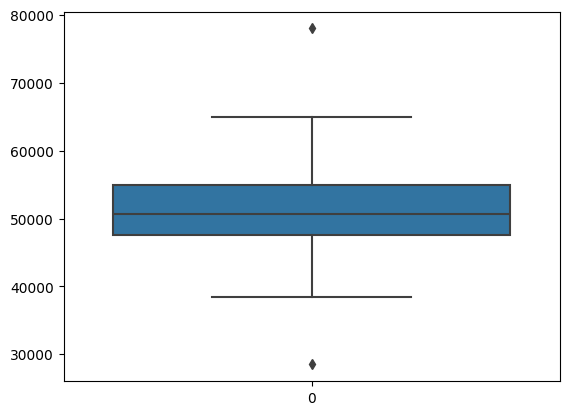

In [39]:
sns.boxplot(df['Salary'])

## Questão 5)

Considere a base de dados disponível em `TACTD-01-Base-Avaliacao2024.csv`, e busque por linhas duplicadas considerando apenas os dados nas colunas `Name`, `Sex`, `City` e `Year of Birth`. 

A seguir, busque por atributos não informativos (redundantes/constantes) em todas as colunas. Quantas linhas duplicadas foram encontradas, e qual(is) atributo(s) pode(m) ser considerado(s) não informativo(s)?

(a) 1 linha duplicada; atributos não informativos: Continent of Origin<br>
(b) 1 linha duplicada; atributos não informativos: Profession e Country of Origin<br>
**(c) 4 linhas duplicadas; atributos não informativos: Current Age 2022, Continent of Origin**<br>
(d) 5 linhas duplicadas; atributos não informativos: Country of Origin<br>
(e) 5 linhas duplicadas; atributos não informativos: Current Age 2022 e Continent of Origin<br>

In [40]:
df = pd.read_csv("./dados/TACTD-01-Base-Avaliacao2024.csv")

In [50]:
df_duplicated = df[['Name', 'Sex', 'City', 'Year of Birth']]
df_duplicated[df_duplicated.duplicated()]

,Name,Sex,City,Year of Birth
19,Apolonia Abler,F,Vancouver,1967
20,Apolonia Abler,F,Vancouver,1967
66,Ruby Singleton,F,New Orleans,1982
72,Carlos Cobre,M,São Paulo,1983
